In [13]:
from src.functions import *

In [14]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 4,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

In [15]:
methods = ['random', 'local', 'quantum', 'fixed_gamma_fixed_time', 'ra']

In [16]:
method_colors = {'random': colors['grey'],
                 'local': colors['blue'],
                 'quantum': colors['red'],
                #  'fixed_gamma': colors['purple'],
                 'ra': colors['dark grey'],
                 'fixed_gamma_fixed_time': colors['purple'],
                #  'opt_gamma_opt_time': colors['purple']
                 }

In [17]:
qubit_sweeps = {}
delta = {}
delta_avg = {}
delta_std = {}
fit = {}
k = {}
k_err = {}

for method in methods:
    qubit_sweeps[method] = load_from_json(f'data/qubit_sweep_{method}.json')

    delta[method] = qubit_sweeps[method]['delta']
    delta_avg[method] = qubit_sweeps[method]['delta_avg']
    delta_std[method] = qubit_sweeps[method]['delta_std']
    fit[method] = qubit_sweeps[method]['fit']
    k[method] = qubit_sweeps[method]['k']
    k_err[method] = qubit_sweeps[method]['k_err']

T = qubit_sweeps['quantum']['T']
qubits_range = qubit_sweeps['quantum']['qubits_range']
num_random_models = qubit_sweeps['quantum']['num_random_models']

In [18]:
data = load_from_json(f'data/qubit_sweep_fixed_gamma_fixed_time.json')

In [19]:
data['gamma']

0.45

In [20]:
method_labels = {'quantum' : 'Randomized\n quantum:',
                 'fixed_gamma_fixed_time': 'Quantum:',
                 'random': 'Uniform:',
                 'local': 'Local:'}

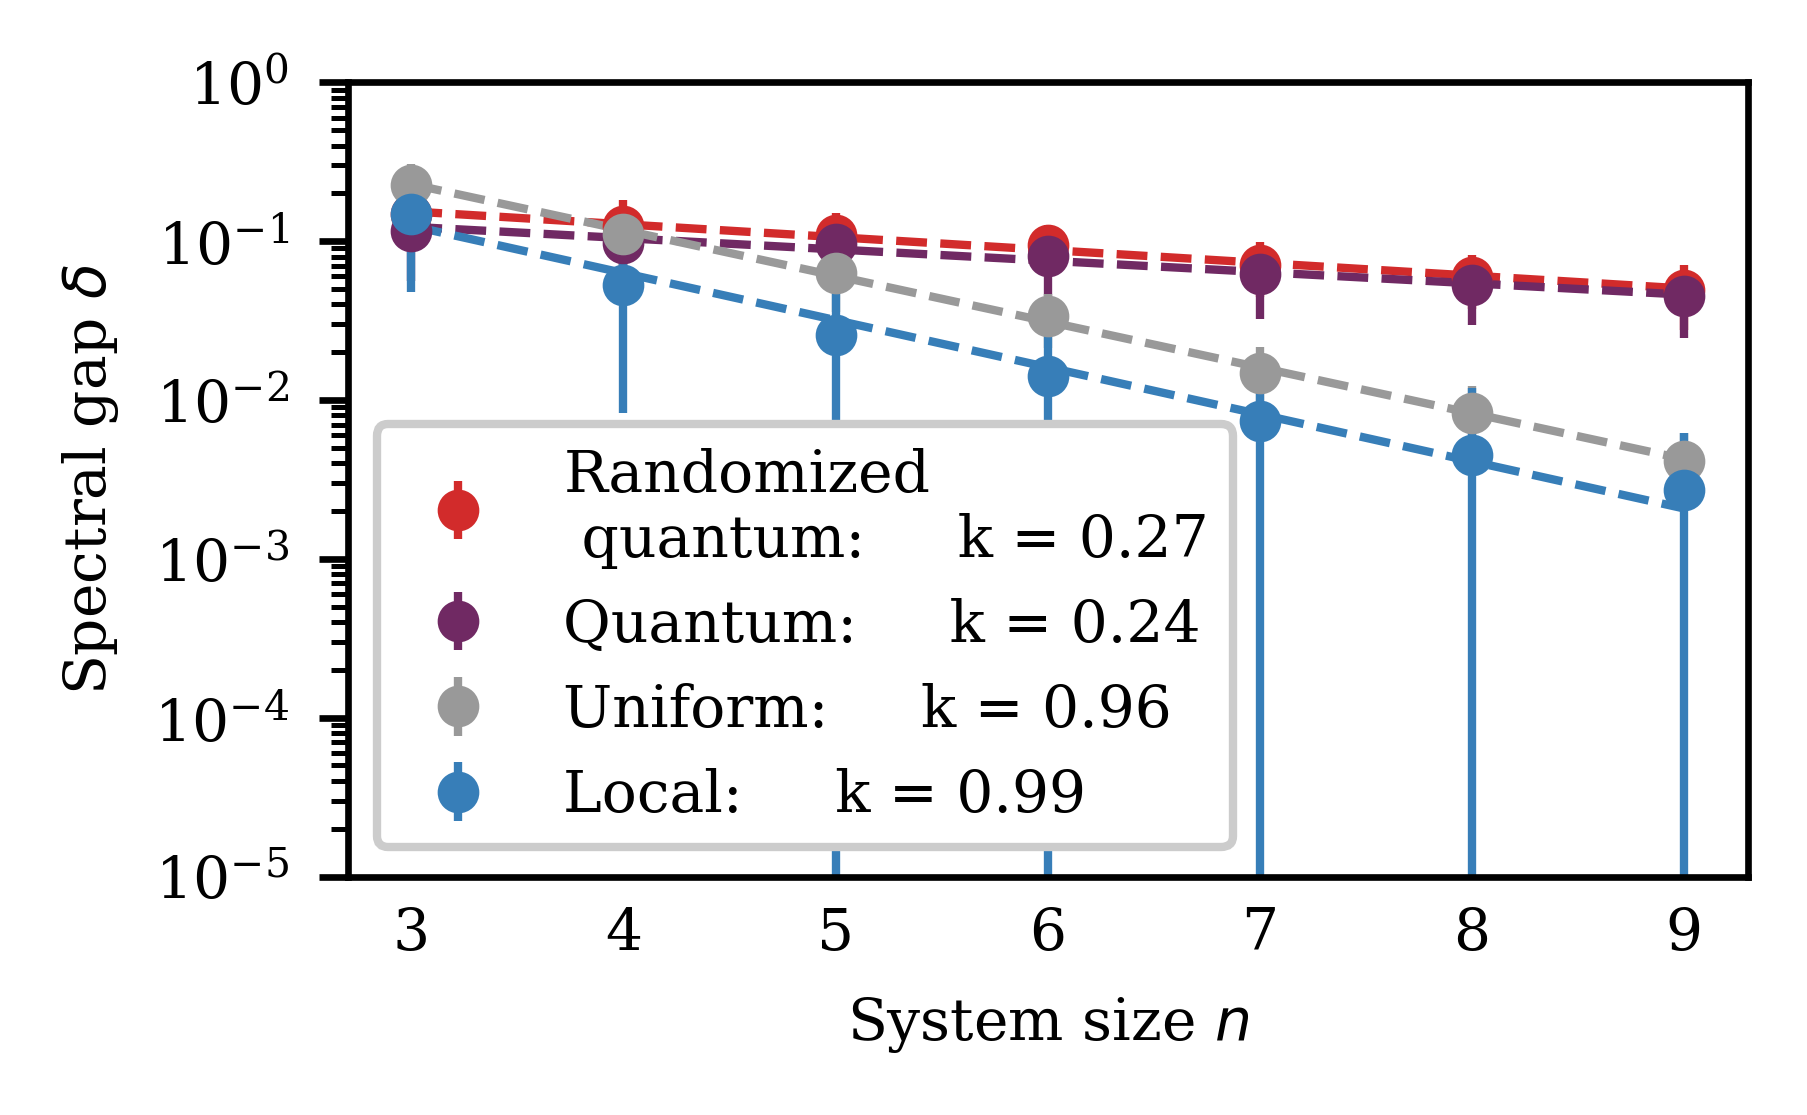

In [21]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

for method in [ 'quantum', 'fixed_gamma_fixed_time', 'random', 'local',]: 
    # Plot the data with error bars
    plt.errorbar(qubits_range, 
                 delta_avg[method], 
                 yerr=delta_std[method], 
                 fmt='o', 
                 color=method_colors[method], 
                 label=method_labels[method]+f'     k = {np.around(np.abs(k[method]),2)}')
    # Plot the fits
    plt.plot(qubits_range, fit[method], '--', color=method_colors[method])

plt.yscale('log')
plt.ylim([0.00001, 1])

# Customize the plot
plt.xlabel('System size $n$')
plt.ylabel('Spectral gap $\delta$')

legend = plt.legend()
legend.get_frame().set_alpha(1)

plt.tight_layout()
plt.show()
fig.savefig(projectdir+f'figures/scale_factors')
fig.savefig(projectdir+f'figures/pdf_figures/scale_factors.pdf')

In [22]:
for method in methods:
    print(f"k factor for {method}: {k[method]} ± {k_err[method]}")

k factor for random: -0.95850488495759 ± 0.017450339151840816
k factor for local: -0.9852212565923386 ± 0.05869119220716332
k factor for quantum: -0.2686269596209183 ± 0.013252968125897277
k factor for fixed_gamma_fixed_time: -0.2364696262087983 ± 0.01902656799227806
k factor for ra: -0.31385410471506636 ± 0.04659908732033943


In [23]:
method_colors['ra']

'#5b5b5b'

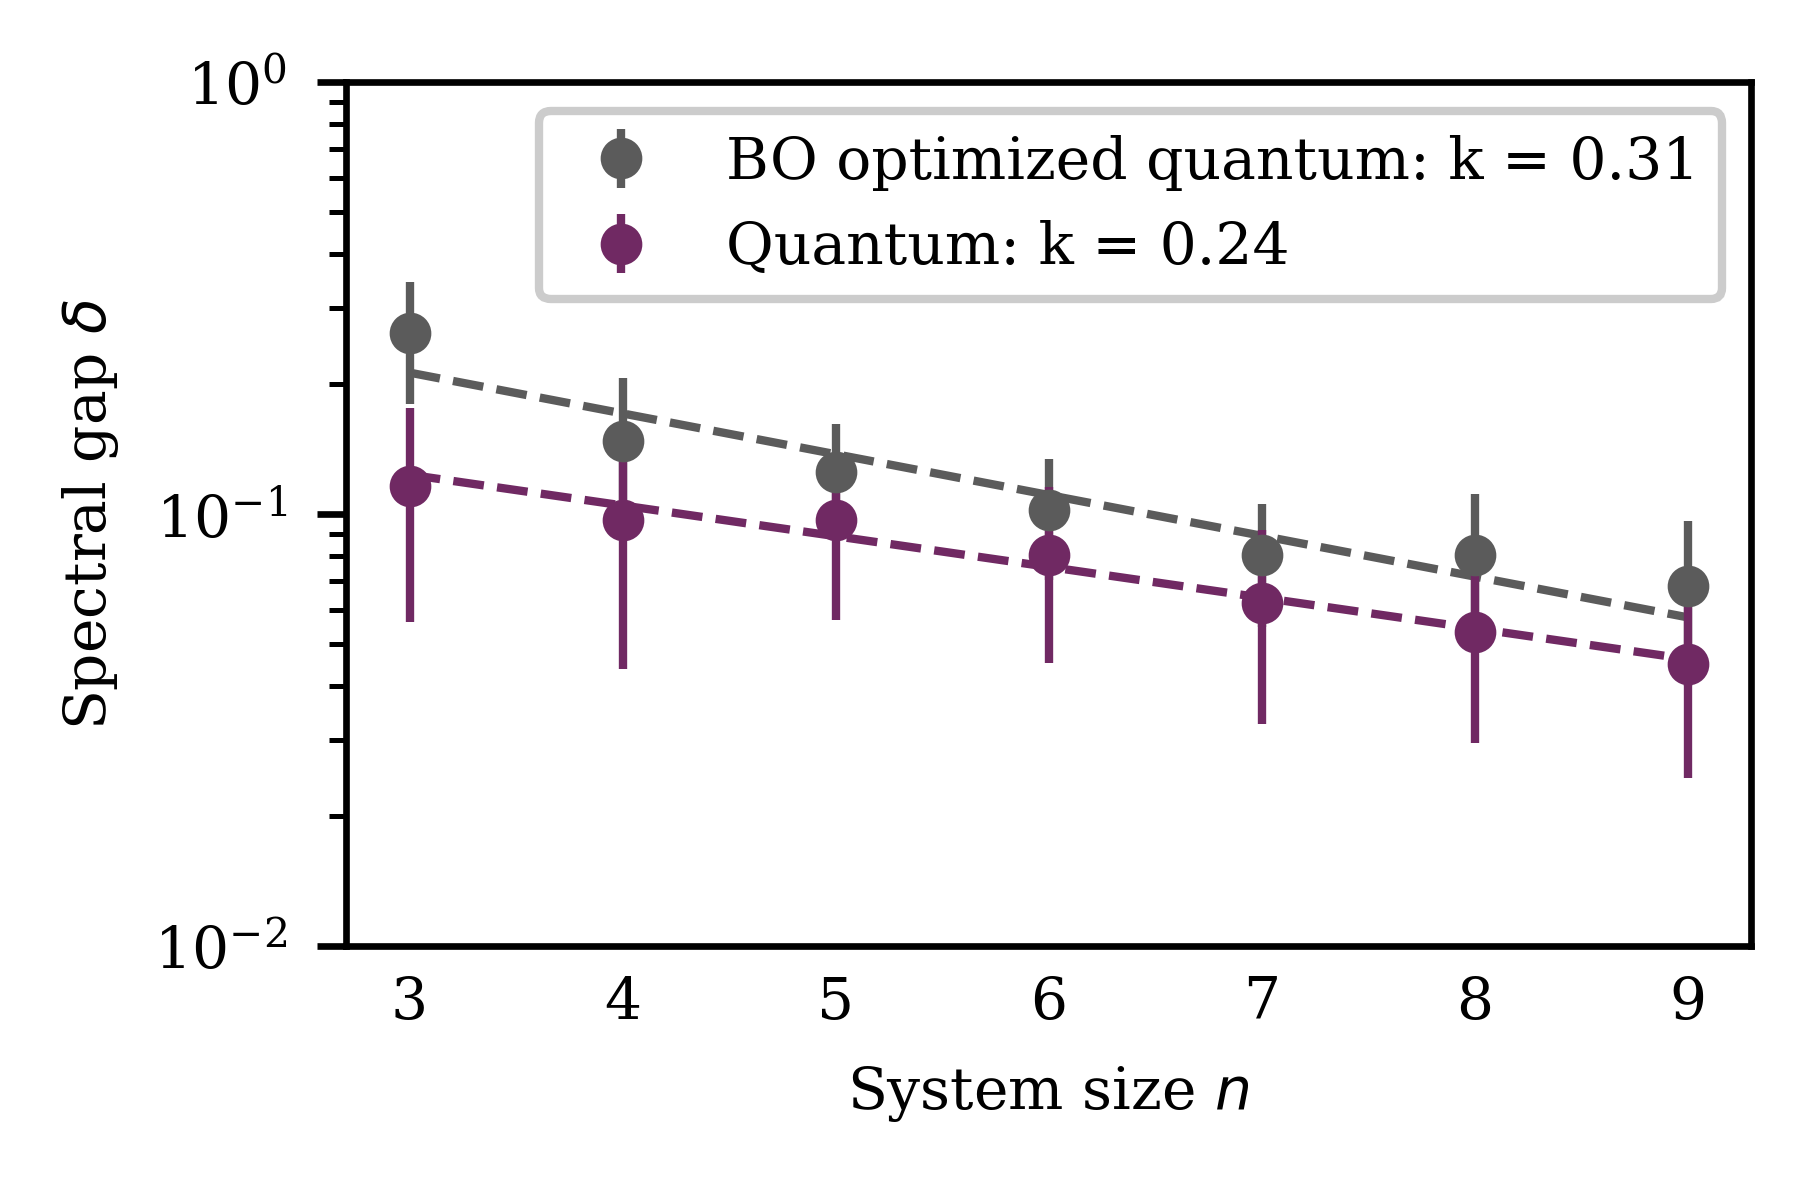

<Figure size 3840x2880 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

plt.errorbar(qubits_range, 
                delta_avg['ra'], 
                yerr=delta_std['ra'], 
                fmt='o', 
                color=method_colors['ra'], 
                label='BO optimized quantum'+f': k = {-np.around(k["ra"],2)}')
# Plot the fits
plt.plot(qubits_range, fit['ra'], '--', color=method_colors['ra'])


# Plot the data with error bars
plt.errorbar(qubits_range, 
                delta_avg['fixed_gamma_fixed_time'], 
                yerr=delta_std['fixed_gamma_fixed_time'], 
                fmt='o', 
                color=method_colors['fixed_gamma_fixed_time'], 
                label='Quantum'+f': k = {-np.around(k["fixed_gamma_fixed_time"],2)}')
# Plot the fits
plt.plot(qubits_range, fit['fixed_gamma_fixed_time'], '--', color=method_colors['fixed_gamma_fixed_time'])

plt.yscale('log')
plt.ylim([0.01, 1])

# Customize the plot
plt.xlabel('System size $n$')
plt.ylabel('Spectral gap $\delta$')

legend = plt.legend()
legend.get_frame().set_alpha(1)

plt.show()
plt.tight_layout()
fig.savefig(projectdir+f'figures/scale_factors_ra')
fig.savefig(projectdir+f'figures/pdf_figures/scale_factors_ra.pdf')